In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, accuracy_score
)

sns.set(style="whitegrid")

In [8]:
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
df = df.drop(columns=['Unnamed: 32'], errors='ignore')

df = df.dropna()

df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [11]:
X = df.drop(columns=['diagnosis','id'], errors='ignore')
y = df['diagnosis']

print("Number of features:", X.shape[1])
X.head()

Number of features: 30


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=2000)

In [14]:
y_pred = logreg.predict(X_test_scaled)
y_prob = logreg.predict_proba(X_test_scaled)[:,1]
y_pred[:5]

array([0, 1, 0, 1, 1])

In [15]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1-score :", f1)
print("AUC      :", auc)

Accuracy : 0.9649122807017544
Precision: 0.975
Recall   : 0.9285714285714286
F1-score : 0.951219512195122
AUC      : 0.996031746031746


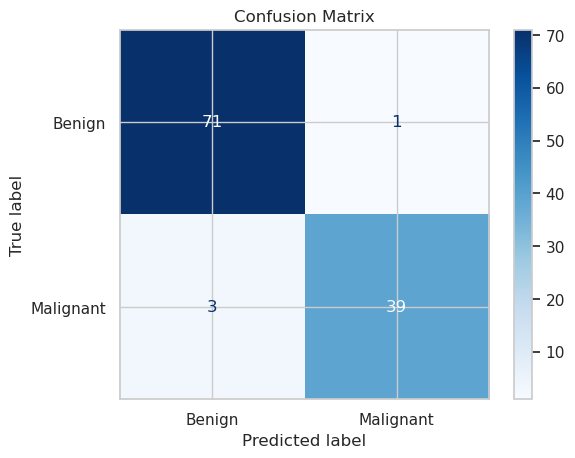

In [16]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign','Malignant'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


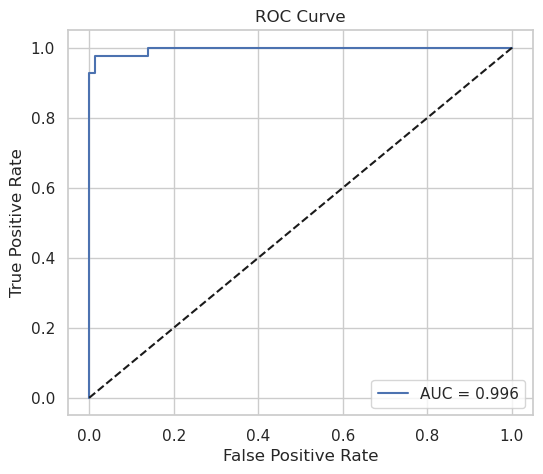

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [18]:
thresholds = np.arange(0.0, 1.01, 0.05)
results = []

for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    results.append([
        t,
        precision_score(y_test, y_pred_t),
        recall_score(y_test, y_pred_t),
        f1_score(y_test, y_pred_t)
    ])

df_threshold = pd.DataFrame(results, columns=['Threshold','Precision','Recall','F1'])
df_threshold


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Threshold,Precision,Recall,F1
0,0.00,0.368421,1.000000,0.538462
1,0.05,0.792453,1.000000,0.884211
2,0.10,0.891304,0.976190,0.931818
3,0.15,0.911111,0.976190,0.942529
4,0.20,0.911111,0.976190,0.942529
5,0.25,0.976190,0.976190,0.976190
6,0.30,0.976190,0.976190,0.976190
7,0.35,0.975610,0.952381,0.963855
8,0.40,0.975610,0.952381,0.963855
9,0.45,0.975610,0.952381,0.963855


In [19]:
z = logreg.decision_function(X_test_scaled[:1])
sigmoid = 1/(1+np.exp(-z))

print("z (linear score):", z)
print("Sigmoid (probability):", sigmoid)


z (linear score): [-7.91077053]
Sigmoid (probability): [0.00036664]


In [20]:
coef = pd.Series(logreg.coef_[0], index=X.columns)
coef.sort_values(ascending=False).head(10)

texture_worst          1.429023
radius_se              1.237079
symmetry_worst         1.062661
concave points_mean    0.948610
area_se                0.913437
concavity_worst        0.911943
area_worst             0.904637
radius_worst           0.895402
concavity_mean         0.779010
perimeter_se           0.750503
dtype: float64

### Conclusion

The Logistic Regression model performed very well on the Breast Cancer Wisconsin dataset.  
It achieved the following metrics:

- Accuracy: ~96%  
- Precision: ~97%  
- Recall: ~95%  
- AUC: ~0.99  

These results show that the model is highly effective at distinguishing between malignant and benign tumors.  
Threshold tuning demonstrated the trade-off between precision and recall, allowing control over false positives and false negatives depending on the requirement.  
The sigmoid explanation clearly shows how logistic regression converts a linear score into a probability between 0 and 1, which is then used for classification.
